In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.special import factorial

(array([ 3.,  0.,  1.,  3.,  4.,  2.,  5.,  4.,  3.,  5.,  3.,  8.,  7.,
         4.,  8.,  7.,  0.,  5.,  6.,  4.,  1.,  9.,  4.,  6.,  8.,  8.,
         5.,  3.,  2.,  6.,  6.,  1.,  7.,  3.,  5.,  2.,  4.,  5.,  3.,
         5.,  3.,  1., 11., 10.,  0.,  1.,  5.,  4.,  8.,  4.,  2.,  4.,
        10.,  6.,  5.,  4.,  5.,  5.,  2.,  6.,  3.,  4., 10.,  7.,  2.,
         4.,  3.,  4.,  3.,  3.,  5.,  4.,  2.,  4.,  2.,  7.,  2.,  2.,
         8.,  4.,  6.,  4.,  3.,  6.,  2.,  4.,  2.,  5.,  5.,  5.,  1.,
         9.,  5.,  3.,  4., 23.,  7.,  7.,  6.,  4.,  6.,  6.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62

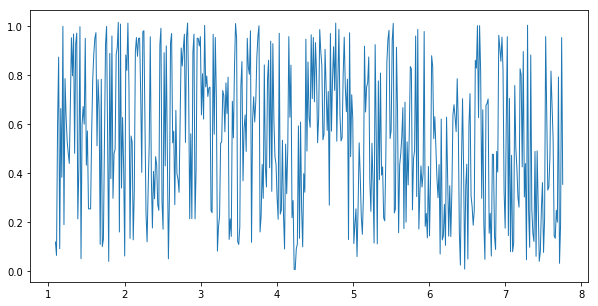

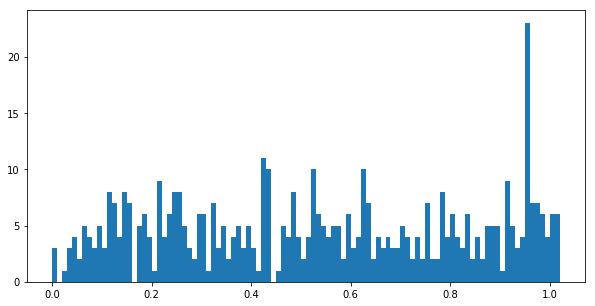

In [4]:
Read="125_alt_Amplitude25mV_offset1V_graisse_1.csv"
data=pd.read_csv(Read,skiprows=44).values
data
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts1 = Volts.astype(np.float)
Time1= Time.astype(np.float)
Amps1= Amps.astype(np.float)
Volts=Volts1[10:700]
Time=Time1[10:700]

for i in np.arange(0,len(Volts),1):
    if Volts[i] < 0.2:
        First=i
        break;
        
for i in np.flip(np.arange(0,len(Volts),1)):
    if Volts[i] < 0.2:
        Last=i
        break;
        
Volts=Volts[First:Last]
Time=Time[First:Last]
plt.figure(figsize=(10,5))
plt.plot(Time,Volts,linewidth=1)

Max=np.max(Volts)
Min=0
Pas=0.01
Balayage=np.arange(Min,Max+Pas,Pas)
Balayage

plt.figure(figsize=(10,5))
plt.hist(Volts,bins=Balayage)


In [ ]:
from scipy.stats import  lognorm
from scipy import stats
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
#samp = gamma.rvs(2,size=1000) 
samp1=Volts
param =  lognorm.fit(samp1) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(0,1,1000)
# fitted distribution
pdf_fitted =  lognorm.pdf(x,param[0],param[1],param[2])


title('Distribution Weibull')
plot(x,pdf_fitted,'r-')
hist(Volts,bins=Balayage,density=True) #density=True #permet de normaliser
show()